In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
# Variables
from variables import paths
# Functions
import functionsScan as scan
import functionsDataset as dataset
import functionsCross as cross

# 1. Model

### 1.a Extract boxes from scans

In [3]:
# Extract training images from empty and crossed pdfs
for type_of_box in ['empty', 'cross']: 
    scan.makeImages(paths, 'train', type_of_box)

### 1.b Merge images into one dataset

In [4]:
# Creates a balanced dataset
X, y = dataset.makeSplit(paths)
print('Shape of images (X) is {} \nShape of labels (y) is {}'.format(X.shape, y.shape))

Shape of images (X) is (20736, 32, 32) 
Shape of labels (y) is (20736,)


### 1.c Train Cross Model

In [5]:
for type_model in ['NN','CNN']:
    print("\n{} Model:".format(type_model))
    cross.trainModel(paths,type_model,X,y) 


NN Model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 131,458
Trainable params: 131,458
Non-trainable params: 0
_________________________________________________________________



Train on 10160 samples, validate on 4355 samples
Epoch 1/12
10160/10160 [==============================] - 2s 153us/sample - loss: 0.8055 - accuracy: 0.5797 - val_loss: 0.6256 - val_accuracy: 0.7284
Epoch 2/12
10160/10160 [===========

# 2. Output

### 2.a Extract boxes from scans & Merge images into one dataset

In [6]:
predict_images = dataset.makeSplit(paths, 'predict', scan.makeImages(paths, 'predict'))

### 2.b Predict crosses

In [7]:
model, _, predictions = cross.modelPredict(paths,'NN', predict_images)

<br>

<br>

# Trying file scanned with diferent settings

In [8]:
cross.modelValidate(paths, 'bool', predictions)


Clasification report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70       194
           1       0.26      0.46      0.34        56

    accuracy                           0.59       250
   macro avg       0.53      0.54      0.52       250
weighted avg       0.68      0.59      0.62       250


Confussion matrix:
 [[121  73]
 [ 30  26]]


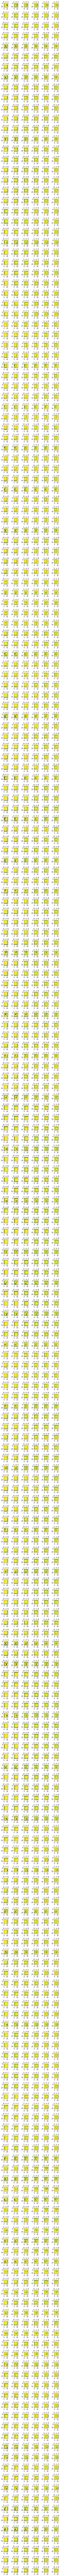

In [9]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(nrows=len(predictions), ncols=6, figsize=(6,len(predictions)))
for i, label in enumerate(predictions):
    for j in range(6):
        axes[i,j].imshow(predict_images[i*6+j,:,:])
        title = "{} -> {}".format(_[i*6+j], label)
        axes[i,j].set_title(title)
plt.tight_layout()
plt.show()